# Projoect: Unsupervised 
    
## Background: 

AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.
Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

## Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers?

## Analysis of problem statement.

1. AllLife Bank want to focus on it credit bank customer in next year campaign
2. With the aim of increasing it market peneration
3. They wish to improve the support service by by upgrading its customers service delivery model to ensure the queries 
    are resolved promptly.
4. To identify the segmentation of the existing customer based on their spending patterns as well as their past interaction
   with the bank.
5. Finally, to come out with a model that can better it service an improve customers satisfaction`

In [85]:
#Import all the necessary modules
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
#import sklearn.metrics

In [86]:
#Import the csv dataset
df = pd.read_excel ("C:\\Users\isaac\csv/creditcard.xlsx")

df.head(3)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4


In [87]:
# check the head and tail, to get a better view of the dataset
df.tail(3)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [88]:
# check the size of dataset

totalrow=df.shape[0]
totalcol=df.shape[1]
print("The number of rows in the dataset:",totalrow)

print("The number of columns in the dataset:",totalcol)

The number of rows in the dataset: 660
The number of columns in the dataset: 7


In [89]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [90]:
# Check the data type composition
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

Observation:
    1. All the data types are integer value
    2. S1_no and Customer key are not valuable to the data analysis or communication, hence we shall drop them

In [91]:
# check for null values

df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Observation:
    No missing value

In [92]:
# get the dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [93]:
# Check for the uniqueness counts of the function attributes

df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [94]:
# Drop unneeded variables as they would not help in the analysis.
df=df.drop({"Sl_No","Customer Key"},axis=1)

In [95]:
df.shape

(660, 5)

In [96]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()

Number of duplicate rows = 11


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [97]:
#drop duplicates
df2=df.drop_duplicates()

In [98]:
df2.shape

(649, 5)

In [99]:
# make copy of the dataset
df=df2
df_copy=df2

In [100]:
df.shape

(649, 5)

In [101]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


In [102]:
# Checking for dispersion, inter quantile range
IQR = df.quantile(0.75) - df.quantile(0.25)
display("IQR:",IQR)

'IQR:'

Avg_Credit_Limit       38000.0
Total_Credit_Cards         3.0
Total_visits_bank          3.0
Total_visits_online        3.0
Total_calls_made           4.0
dtype: float64

In [103]:
# Range
display("Range :",df.max()-df.min())

'Range :'

Avg_Credit_Limit       197000
Total_Credit_Cards          9
Total_visits_bank           5
Total_visits_online        15
Total_calls_made           10
dtype: int64

In [104]:
# Variance
display("Variance",df.var().round(2))

'Variance'

Avg_Credit_Limit       1.429879e+09
Total_Credit_Cards     4.730000e+00
Total_visits_bank      2.640000e+00
Total_visits_online    8.720000e+00
Total_calls_made       8.280000e+00
dtype: float64

In [105]:
# Coveriance

display("Coveriance",df.cov())

'Coveriance'

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.429879e+09,50356.471970,-6093.510434,61741.202039,-45526.819513
Total_Credit_Cards,5.035647e+04,4.725247,1.100516,1.090961,-4.087135
Total_visits_bank,-6.093510e+03,1.100516,2.641105,-2.658953,-2.358419
Total_visits_online,6.174120e+04,1.090961,-2.658953,8.719545,1.066349
Total_calls_made,-4.552682e+04,-4.087135,-2.358419,1.066349,8.282372


In [106]:
#Check Kurtosis
display("Kurtosis",df.kurtosis().round(2))

'Kurtosis'

Avg_Credit_Limit       5.04
Total_Credit_Cards    -0.37
Total_visits_bank     -1.09
Total_visits_online    5.63
Total_calls_made      -0.54
dtype: float64

In [107]:
#Check skewness
display("Skewness",df.skew().round(2))

'Skewness'

Avg_Credit_Limit       2.19
Total_Credit_Cards     0.15
Total_visits_bank      0.15
Total_visits_online    2.21
Total_calls_made       0.66
dtype: float64

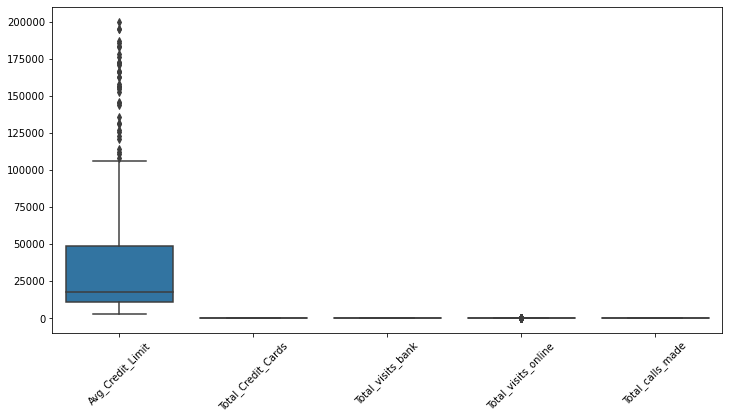

In [108]:
# Investigate the outliers of the dependent variables
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Observation: Outliers identified on the Avg_credit limit. this would be corrected when we scale the dataset

###### Analysis of each attributes with the help of plots :-

Text(0.5, 0, 'Avg_Credit_Limit')

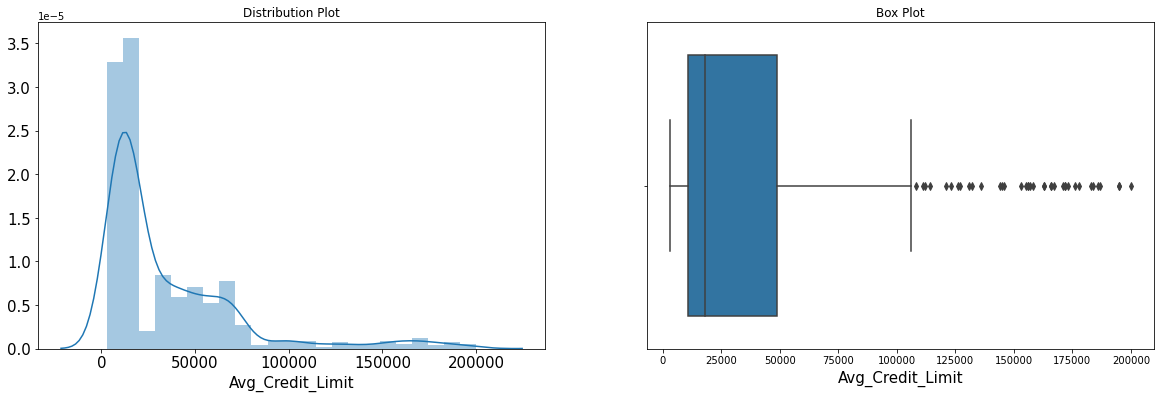

In [109]:
# Avg_credit Limit
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df['Avg_Credit_Limit'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('Avg_Credit_Limit', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['Avg_Credit_Limit'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('Avg_Credit_Limit', fontsize=15)

Observation: There are outliers in the avg_credit limit, the graph is skewed to the right because of the outliers

Text(0.5, 0, 'Total_Credit_Cards')

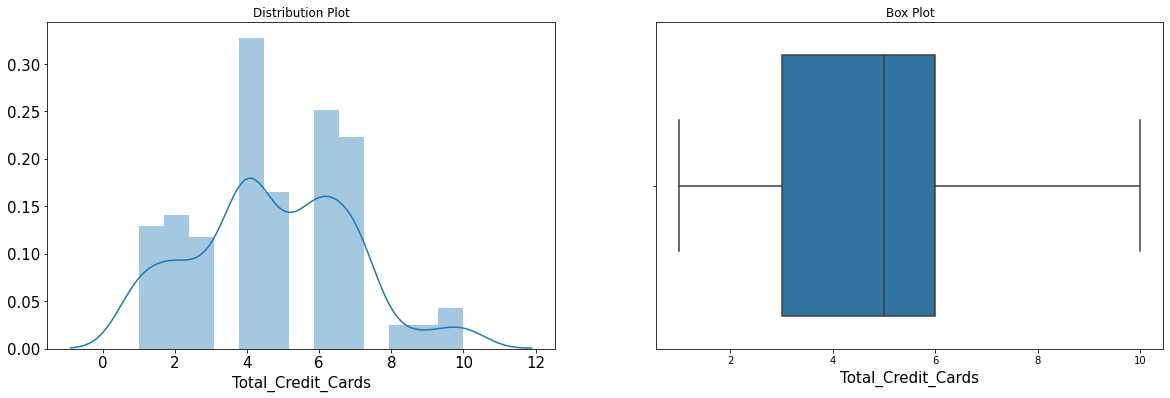

In [110]:
# Total_Credit_Cards
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df['Total_Credit_Cards'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('Total_Credit_Cards', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['Total_Credit_Cards'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('Total_Credit_Cards', fontsize=15)

Observation: No Outliers

Text(0.5, 0, 'Total_visits_bank')

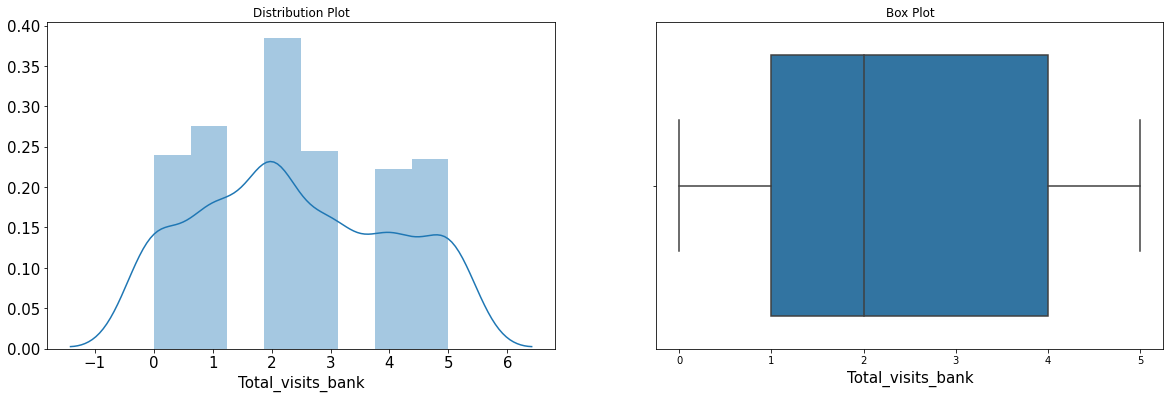

In [111]:
# Total_visits_bank
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df['Total_visits_bank'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('Total_visits_bank', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['Total_visits_bank'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('Total_visits_bank', fontsize=15)

Text(0.5, 0, 'Total_visits_online')

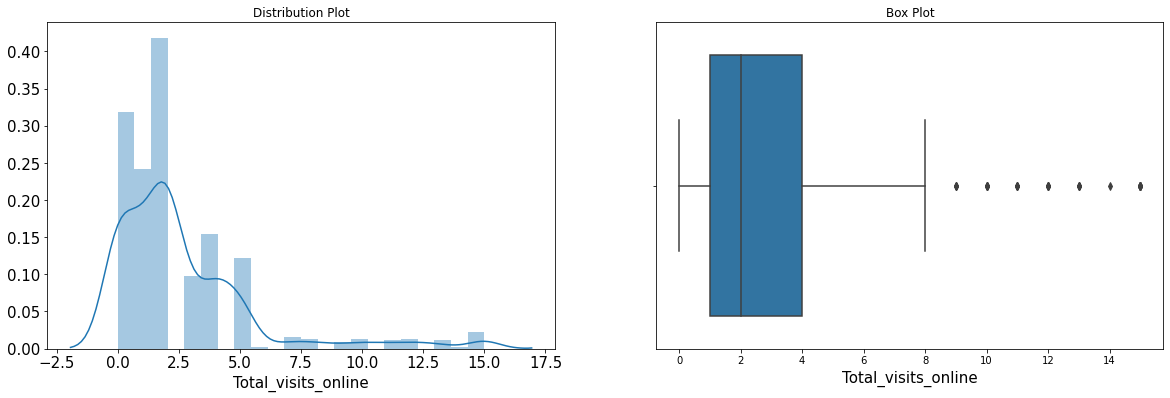

In [112]:
# Total_visits_online
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df['Total_visits_online'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('Total_visits_online', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['Total_visits_online'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('Total_visits_online', fontsize=15)

Observeration: Skewed positively to the right, with some few outliers

Text(0.5, 0, 'Total_calls_made')

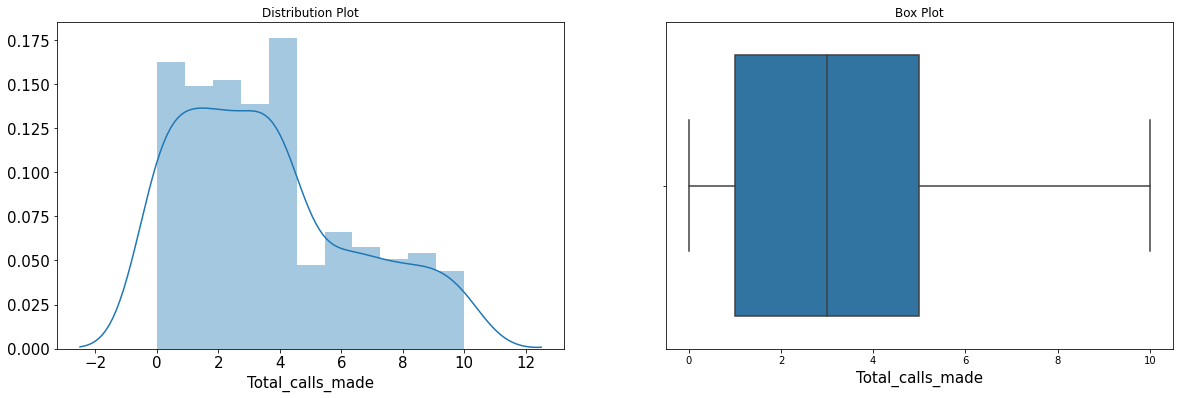

In [113]:
# Total_calls_made
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df['Total_calls_made'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('Total_calls_made', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['Total_calls_made'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('Total_calls_made', fontsize=15)

In [114]:
df_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [115]:
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.612623,-0.099157,0.552941,-0.418351
Total_Credit_Cards,0.612623,1.000000,0.311524,0.169961,-0.653325
Total_visits_bank,-0.099157,0.311524,1.000000,-0.554078,-0.504256
Total_visits_online,0.552941,0.169961,-0.554078,1.000000,0.125480
Total_calls_made,-0.418351,-0.653325,-0.504256,0.125480,1.000000


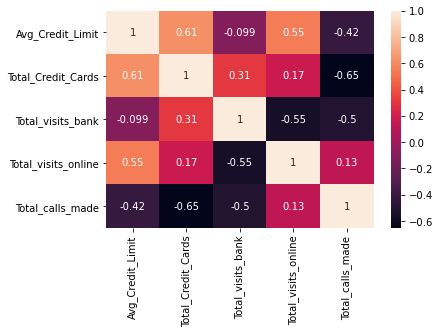

In [116]:
sns.heatmap(df.corr(), annot = True)

Note: No visible correlations

### Scaling of the data

In [117]:
# Scaling the data to remove outliers and normalize the dataset
from scipy.stats import zscore
dfScaled=df.apply(zscore)
dfScaled


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216
...,...,...,...,...,...
655,1.697034,2.436005,-0.860606,2.499808,-1.248443
656,1.300046,2.436005,-0.860606,3.516546,-0.552958
657,2.914461,1.515232,-0.860606,2.160895,-0.900701
658,3.629038,2.436005,-0.860606,4.194372,-1.248443


### Performing bi-variate analuysis using pairplot on the scaled dataset

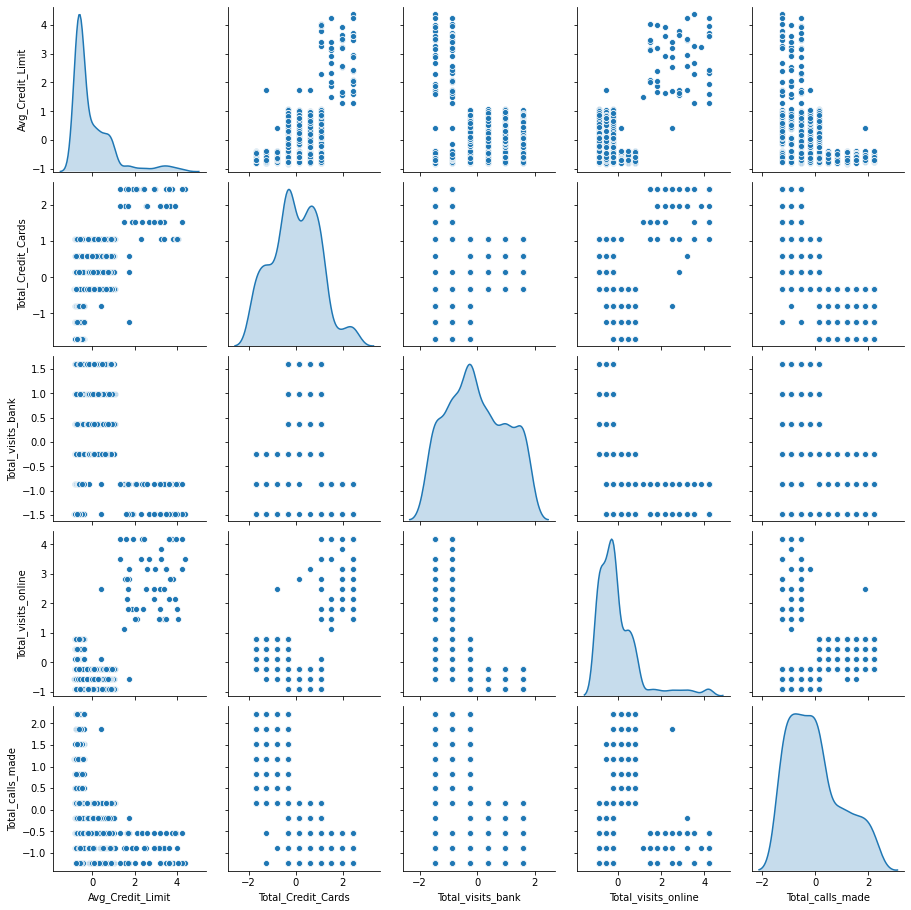

In [118]:
sns.pairplot(dfScaled,diag_kind='kde')

Observation:
    1. on the total_credit card column, it shows that we would need a minimum of 3 clusters
    2. Avg_credit card limit, Total_visit_online,shows some skweness to the right.

### Question 3: Execute K-means clustering use elbow plot and analyse clusters using boxplot
Now, we use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of 
groups. For that we conduct the knee test to see where the knee happens

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

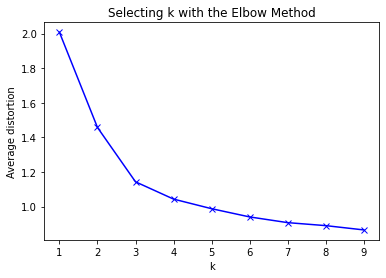

In [119]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Note: the elbow is clearly at 3


In [120]:
# Let us first start with K =3
model=KMeans(3)
model.fit(dfScaled)
prediction =model.predict(dfScaled)


In [121]:
print(prediction)

[0 1 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [122]:
#Append the prediction /assign the samples to groups
df["Group"] = prediction
dfScaled["Group"] = prediction

print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [123]:
dfScaled["counts"]=dfScaled.groupby("Group")["Group"].transform('count')

In [124]:
df["counts"]=df.groupby("Group")["Group"].transform('count')

In [125]:
bankSuppClust = df.groupby(['Group'])
bankSuppClust.mean()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
Group,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378.0
1,12239.819005,2.411765,0.945701,3.561086,6.891403,221.0
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50.0


In [160]:
#dfScaled=dfScaled.drop("counts",axis=1)
dfscaled=dfScaled.drop("counts", axis=1)
dfscaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443,0
1,0.400209,-0.786701,-1.476410,2.499808,1.881237,1
2,0.400209,1.054846,-0.860606,0.127419,0.142526,0
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526,0
4,1.723499,0.594459,-1.476410,3.177634,-0.205216,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C8FF54948>,
      dtype=object)

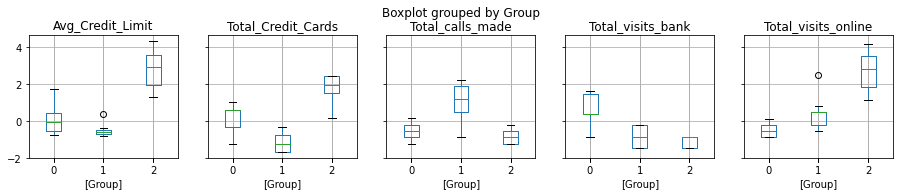

In [162]:
dfscaled.boxplot(by='Group', layout = (2,5),figsize=(15,5))

In [164]:
bankSuppClust.median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
Group,,,,,,
0,32000,6,3,1,2,378
1,12000,2,1,4,7,221
2,145500,9,1,11,1,50


###### Observation: 
Observation:
    
    1. Avg_credit limit: Group 2: has a higher credit limit, followed by group 1 and then group 0
    2. Total Credit Card: Group 2 has a more credit card, followed by group 1 and then group 0
    3. Total Call made: Group 0 make most call, followed by group 1 and then group 2
    4. Total Visit to bank: group 1, makes most visit to the bank, followed by group 1 and lastly by group 2
    5. Total visit online: Does most its transaction online folled by group 0 and lastly group 1.
###### Conclusion:    
1. The customer are segemented into 3 unique clusters of 0,1 & 2
2. Group 0, has the lowest Avg_credit_limit of 1200, less credit card of 2, visit the the bank less,does an average
   online transaction of 4, makes the most phone call, I believe has more issues to resolve or needs assistances.
   No of sample in this category is 221
3. Group 1, has credit_limit of 3200, 6 credit card, prefer to do most of his transaction in the bank, is sparsely online
   makes a moderate call of 2. Most of the sample falls under this category = 378
4. Group 2, This are the heavy spenders, with large credit_limit of 145500, more credit of 9, hardly visit the bank, 
   makes most of is transactions online, hardly calls the bank. No of sample is 50

### Question 4: Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff.  Analyse clusters formed using boxplot

In [165]:

custDataAttr=df2.iloc[:,0:]
custDataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts
0,100000,2,1,1,0,0,378
1,50000,3,0,10,9,1,221
2,50000,7,1,3,4,0,378
3,30000,5,1,1,4,0,378
4,100000,6,0,12,3,2,50


In [166]:
custDataScaled=custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443,-0.778109,0.768956
1,0.400209,-0.786701,-1.476410,2.499808,1.881237,0.795077,-0.764426
2,0.400209,1.054846,-0.860606,0.127419,0.142526,-0.778109,0.768956
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526,-0.778109,0.768956
4,1.723499,0.594459,-1.476410,3.177634,-0.205216,2.368264,-2.434544
5,-0.393766,-0.786701,-1.476410,-0.550407,1.533495,0.795077,-0.764426
6,1.723499,0.134072,-1.476410,2.838721,-0.552958,2.368264,-2.434544
7,-0.526095,-0.786701,-1.476410,-0.550407,-0.900701,0.795077,-0.764426
8,-0.790753,-1.247087,-1.476410,-0.211494,-0.552958,0.795077,-0.764426
9,-0.843684,-0.326314,-1.476410,-0.550407,1.185753,0.795077,-0.764426


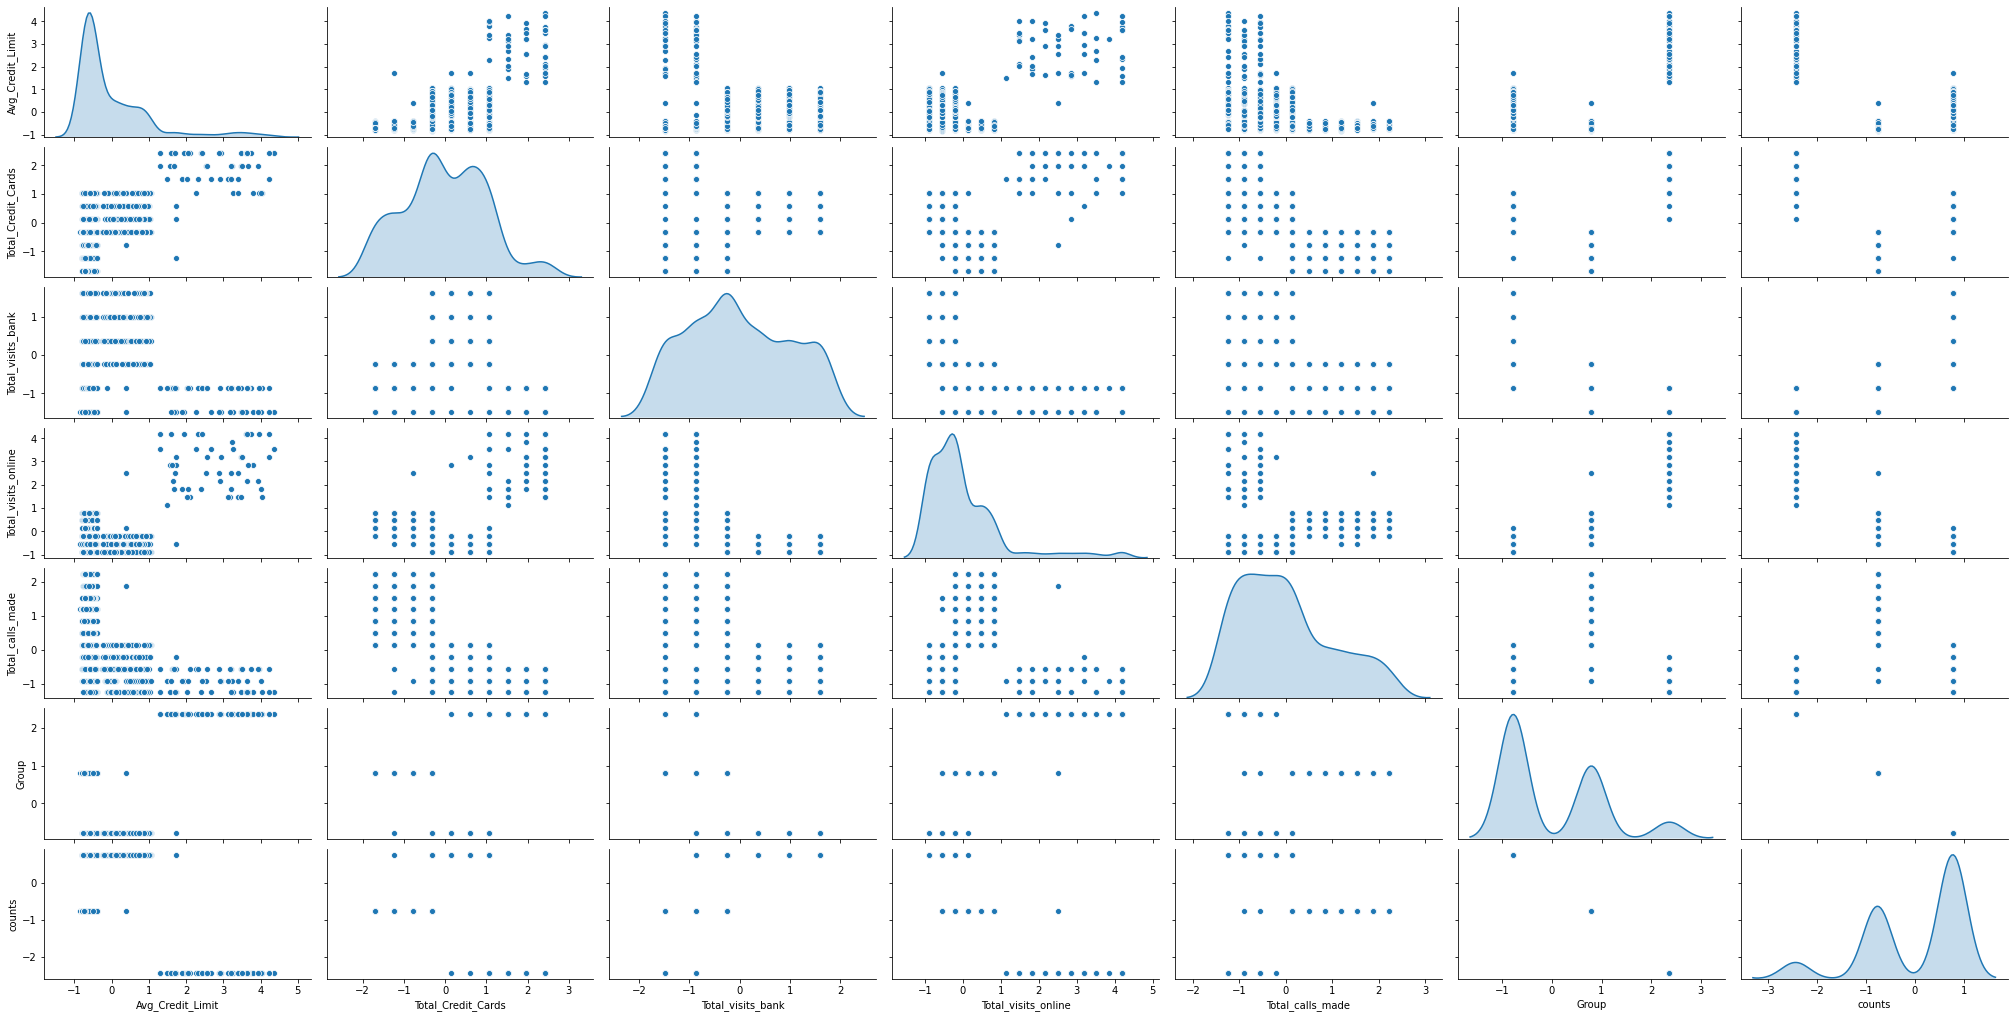

In [167]:

#importing seaborn for statistical plots
sns.pairplot(custDataScaled, height=2,aspect=2 , diag_kind='kde')

In [168]:

from sklearn.cluster import AgglomerativeClustering 

In [169]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [170]:
model.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [171]:
custDataAttr['labels'] = model.labels_
custDataScaled['labels'] = model.labels_
custDataAttr.head(10)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts,labels
0,100000,2,1,1,0,0,378,0
1,50000,3,0,10,9,1,221,2
2,50000,7,1,3,4,0,378,0
3,30000,5,1,1,4,0,378,0
4,100000,6,0,12,3,2,50,1
5,20000,3,0,1,8,1,221,2
6,100000,5,0,11,2,2,50,1
7,15000,3,0,1,1,1,221,2
8,5000,2,0,2,2,1,221,2
9,3000,4,0,1,7,1,221,2


In [172]:
custDataClust = custDataAttr.groupby(['labels'])


In [173]:
custDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts
labels,,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,0,378.0
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50.0
2,12239.819005,2.411765,0.945701,3.561086,6.891403,1,221.0


In [174]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [175]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [177]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.9614522839549124

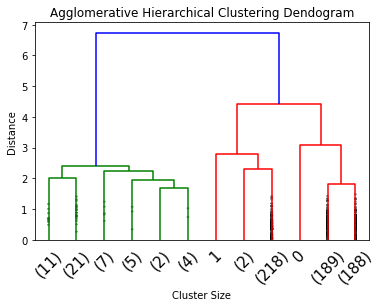

In [178]:
dendrogram(Z, truncate_mode="lastp",p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [179]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.9486382375113611

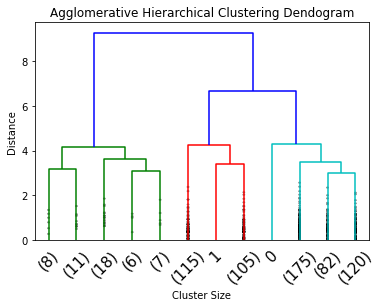

In [180]:
dendrogram(Z, truncate_mode="lastp",p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [181]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8529145537629678

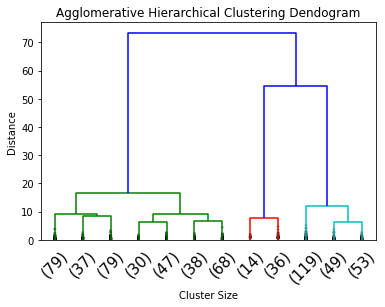

In [182]:
dendrogram(Z, truncate_mode="lastp",p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [183]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.9375457165050055

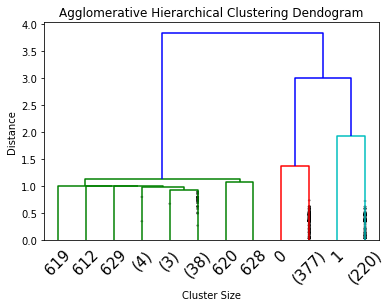

In [184]:
dendrogram(Z, truncate_mode="lastp",p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [147]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.9614522839549124

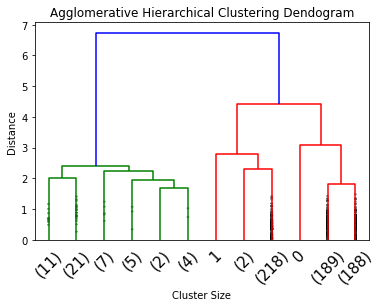

In [148]:
dendrogram(Z, truncate_mode="lastp",p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

Observation on the linkage methods:
    
    1. linkage(metric='euclidean', method='average') = 0.96
    2. linkage(metric='euclidean', method='complete') = 0.94
    3. linkage(metric='euclidean', method='ward') = 0.85.  
    4. linkage(metric='euclidean', method='Single') = 0.93
    
Conclusion:
    
    The best linkage method is linkage(metric='euclidean', method='average')  at 96%
        

In [151]:
custDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts,labels
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443,-0.778109,0.768956,0
1,0.400209,-0.786701,-1.476410,2.499808,1.881237,0.795077,-0.764426,2
2,0.400209,1.054846,-0.860606,0.127419,0.142526,-0.778109,0.768956,0
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526,-0.778109,0.768956,0
4,1.723499,0.594459,-1.476410,3.177634,-0.205216,2.368264,-2.434544,1


In [152]:
custDataScaled=custDataScaled.drop({"Group","counts",},axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C8EBA9A08>,
      dtype=object)

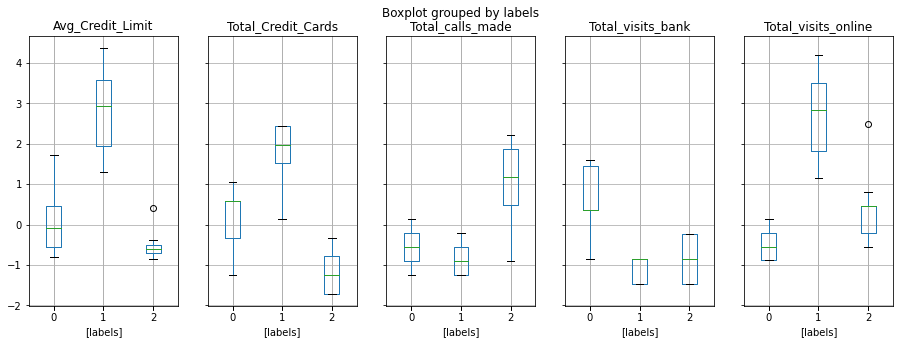

In [153]:
custDataScaled.boxplot(by='labels', layout = (1,5),figsize=(15,5))

In [154]:
custDataScaled["counts"]=custDataScaled.groupby("labels")["labels"].transform('count')

bankSuppClust2 = custDataScaled.groupby(['labels'])
bankSuppClust2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
labels,,,,,,
0,-0.021354,0.372791,0.669127,-0.556683,-0.555718,378
1,2.809656,1.855918,-1.106928,2.804830,-0.872881,50
2,-0.599145,-1.057516,-0.894044,0.317578,1.147989,221


In [155]:
custDataClust.median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts
labels,,,,,,,
0,32000,6,3,1,2,0,378
1,145500,9,1,11,1,2,50
2,12000,2,1,4,7,1,221


Observation:
    
    1.  Avg_credit Limit: Group 1, has the highest avg credit card limit with about 145500, followed by group 0
        with a credit limit of 32000 and lastly is group 3, with 1200
        
    2. Total_Credit Card: group 1: has the highest no of credit cards with 9, followed by group 0 with 6 and 
       lastly group 2 with 2
    3. Total_visit to Bank: group 0, visit the 0 visit more often with a average of 3, while group 1 & 2 with 1 visit.
    4. Total_visit online: Group 1, perform more of online transaction with 11 visit, followed by group 2 and lastly 
       by group 1
    5. Total_calls_made: group 2 makes most of the calls with an average of about 7 call, followed by group 0
       while group 2 hardly makes calls.
    

Conclusion:
    
    1. Group 1: has the lowerest sample of 50, this category are the high spender or premium customers with a high
       Total credit limit, they perform most of there transaction online, hardly visit bank or make calls, they have
       most credit cards.
        
    2. Group 2: has about 221 samples, they have most issues as they make the most calls either to resolve on issues 
       or the other, we need a deeper knowledge of what there peculiar issues are to help resolve.
    
    3. Group 0: can be classified as the traditional customer, who are yet to embrace technology fully, as they still
       conduct most of there transaction in the bank.They have the highest sample of about 378.

### Question 5: Calculate average Silhouette score of both methods

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
#let's plot the silohouette score as a function of K:


In [73]:
df_clustering=df.apply(zscore)
df_clustering=df_clustering.drop({"Group","counts"},axis=1)
df_clustering

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216
...,...,...,...,...,...
655,1.697034,2.436005,-0.860606,2.499808,-1.248443
656,1.300046,2.436005,-0.860606,3.516546,-0.552958
657,2.914461,1.515232,-0.860606,2.160895,-0.900701
658,3.629038,2.436005,-0.860606,4.194372,-1.248443


In [74]:
X = dfScaled.iloc[:,:].values

In [75]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

###### A- Average Silhoutte for K-mean clusering at k=3

For n_clusters = 2 The average silhouette_score is : 0.8907640722235792
For n_clusters = 3 The average silhouette_score is : 0.9899499623056663
For n_clusters = 4 The average silhouette_score is : 0.5567800318272197
For n_clusters = 5 The average silhouette_score is : 0.5362174804368567
For n_clusters = 6 The average silhouette_score is : 0.28247325271679097


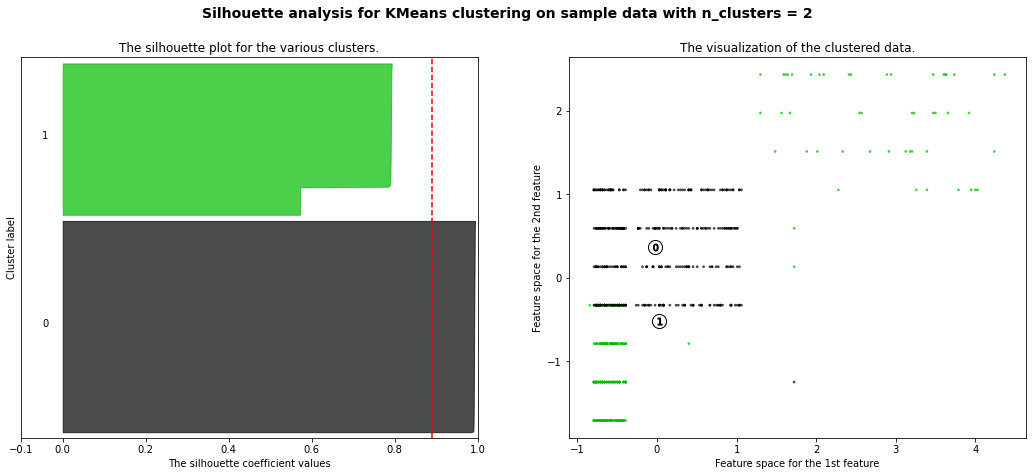

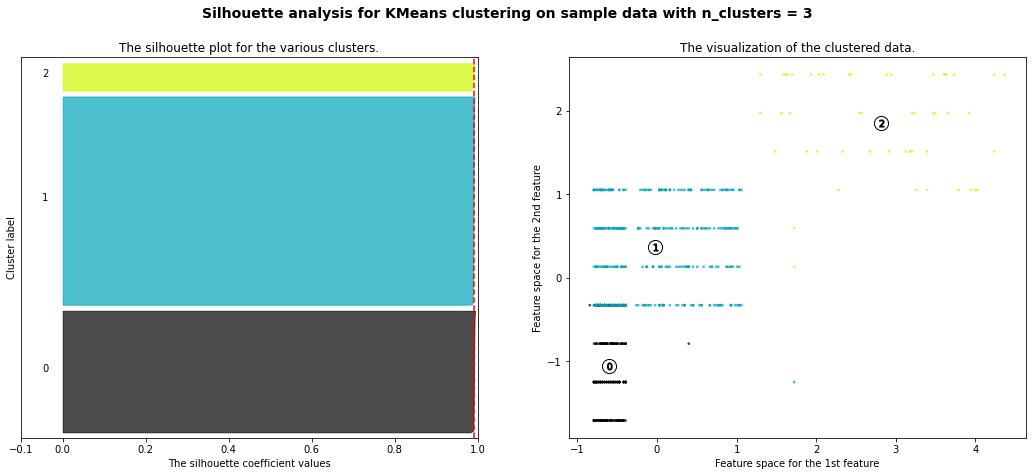

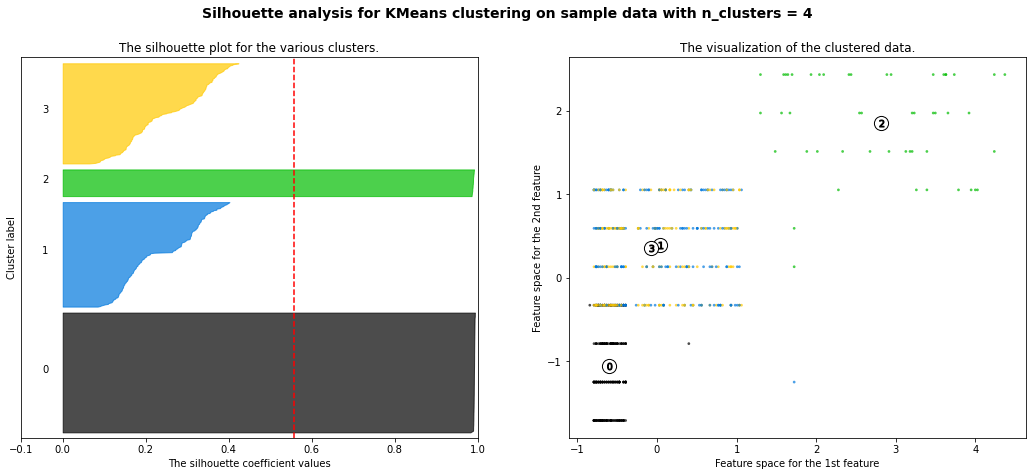

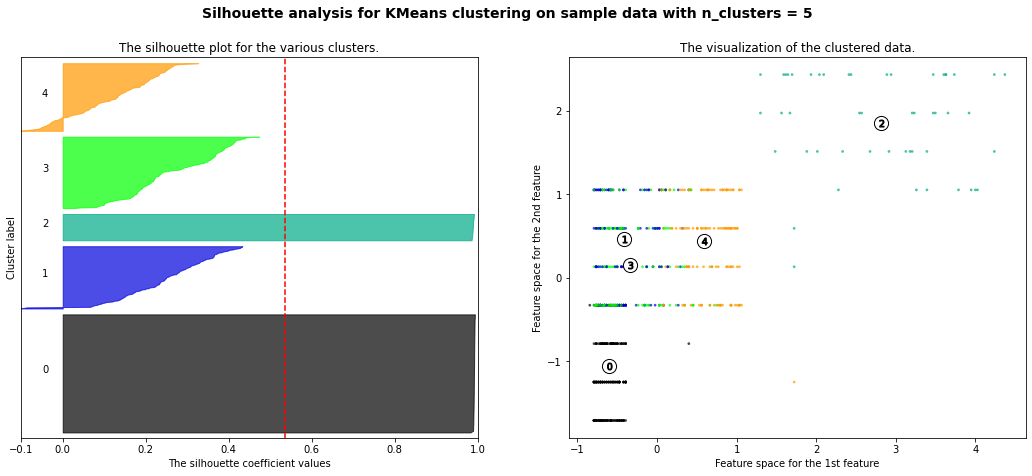

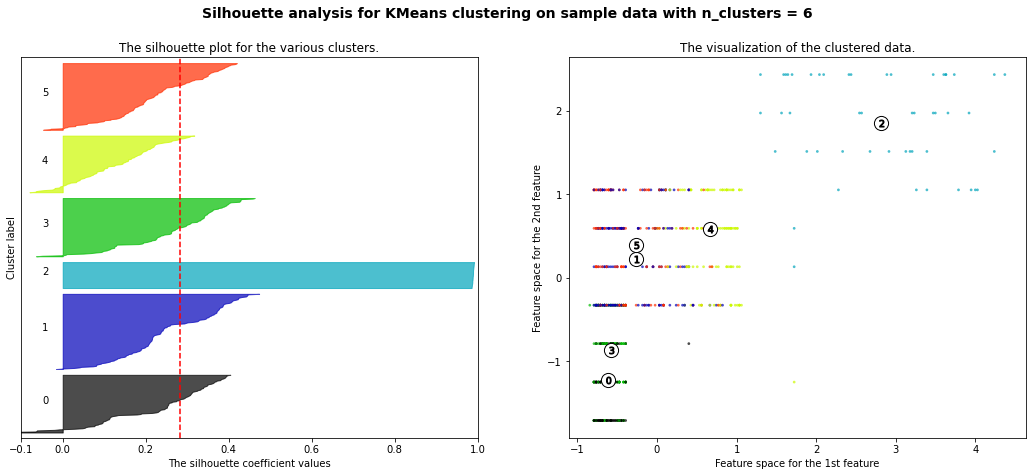

In [77]:


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

    
   


Observation : 
1. For n_clusters = 2 The average silhouette_score is : 0.4452465686318392
2. For n_clusters = 3 The average silhouette_score is : 0.5404024477321487
3. For n_clusters = 4 The average silhouette_score is : 0.36857997028368394
4. For n_clusters = 5 The average silhouette_score is : 0.27627539472735757
5. For n_clusters = 6 The average silhouette_score is : 0.2592091344344803
    
Conclusion: 
    
 The K-mean Clustering algorithms is performing better as 0.54

In [78]:
X = custDataScaled.iloc[:,:].values

In [79]:
silhouette_score(custDataScaled,model.labels_)

0.98995051796938

For n_clusters = 2 The average silhouette_score is : 0.8907681306448391
For n_clusters = 3 The average silhouette_score is : 0.98995051796938
For n_clusters = 4 The average silhouette_score is : 0.5567802224218029
For n_clusters = 5 The average silhouette_score is : 0.5362176710376021
For n_clusters = 6 The average silhouette_score is : 0.2824732527167908


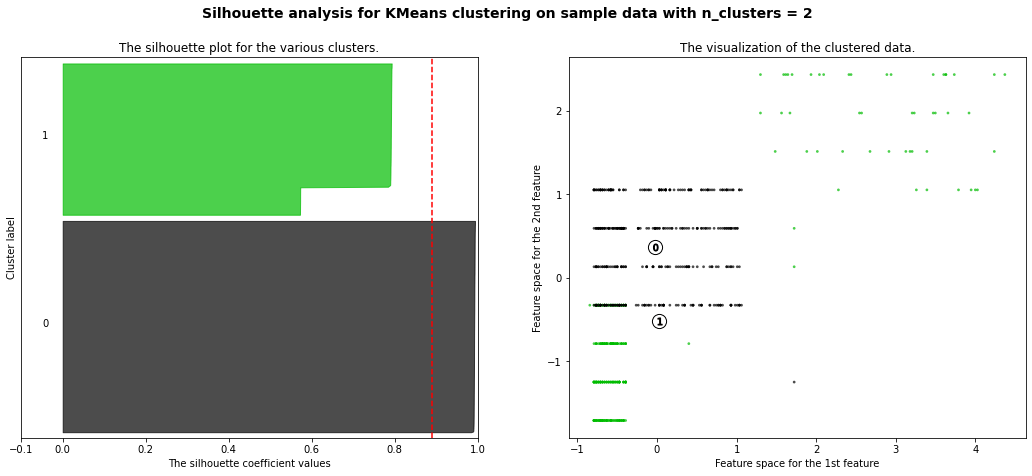

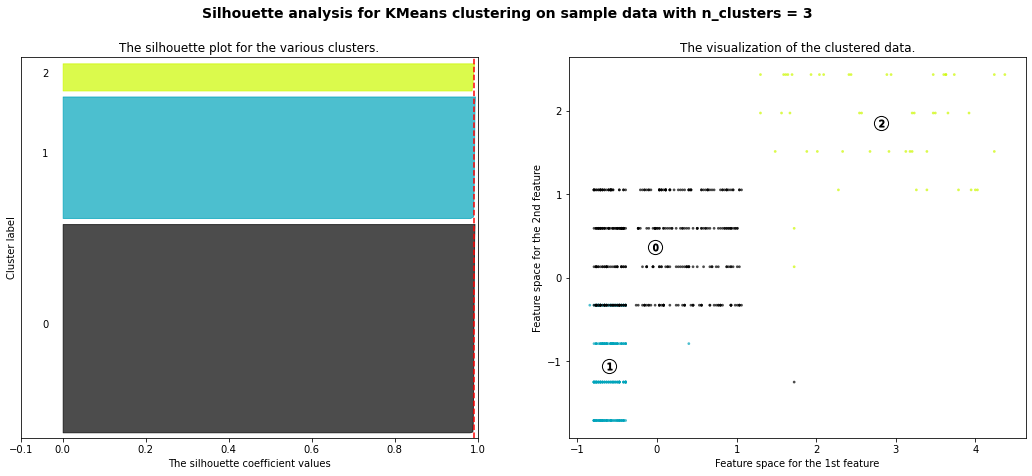

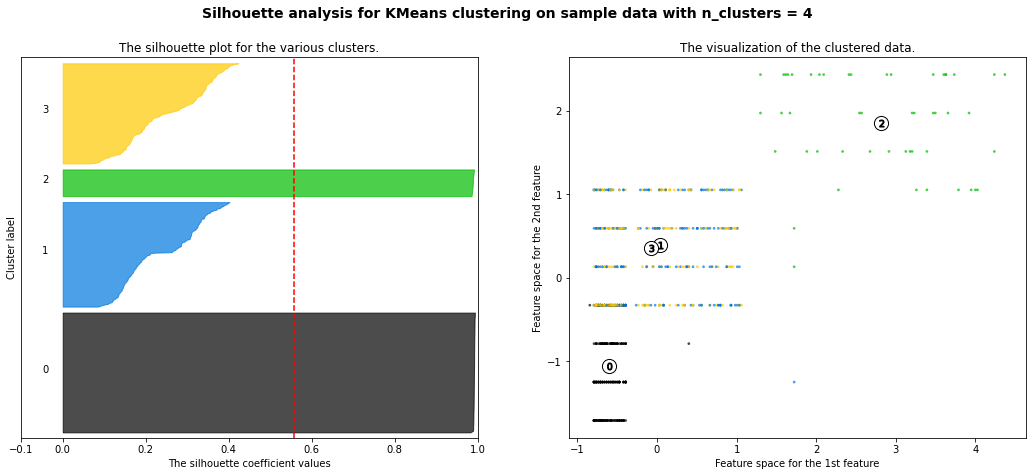

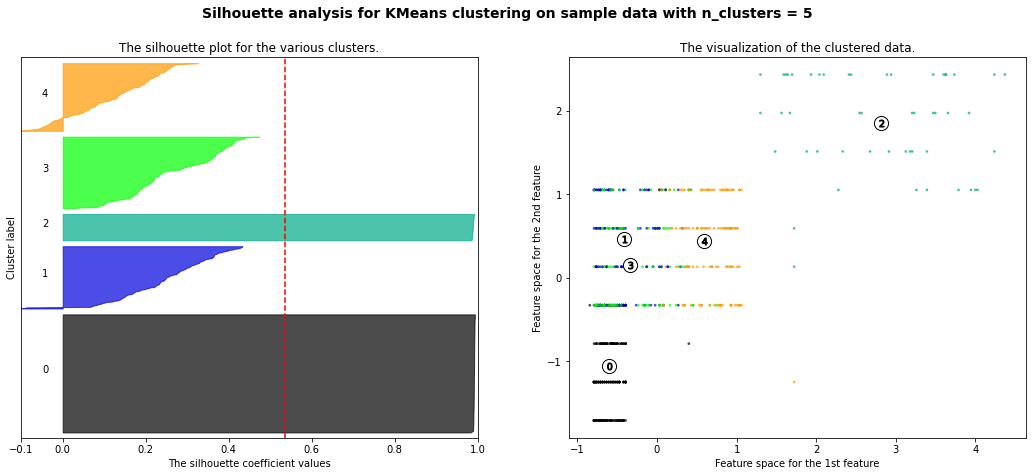

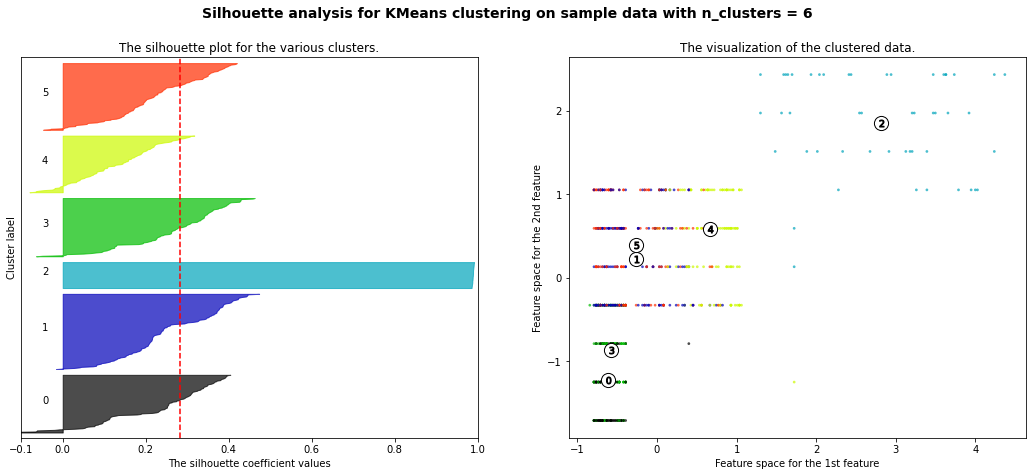

In [80]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Observation:
    
   
1. For n_clusters = 2 The average silhouette_score is : 0.8907681306448391
2. For n_clusters = 3 The average silhouette_score is : 0.98995051796938
3. For n_clusters = 4 The average silhouette_score is : 0.5567802224218029
4. For n_clusters = 5 The average silhouette_score is : 0.5362176710376021
5. For n_clusters = 6 The average silhouette_score is : 0.2824732527167908
    
    
For the Hierarcial clustering cluster 3 is performing at 0.98, hoping it not an overfit.

Cluster 4 and 5 seem to be performing averagely at 0.56 and 0.54 respectively

### Question 6: Compare the K-mean clusters with Hierarchical Cluster

Based on the n-cluster = 3, result from both cluster as very close.

In [81]:
# For k-mean cluster
bankSuppClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
Group,,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063,378.0
1,12239.819005,2.411765,0.945701,3.561086,6.891403,221.0
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50.0


In [82]:
# for Hierarchical clauster
bankSuppClust2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
labels,,,,,,
0,-0.021354,0.372791,0.669127,-0.556683,-0.555718,378
1,2.809656,1.855918,-1.106928,2.804830,-0.872881,50
2,-0.599145,-1.057516,-0.894044,0.317578,1.147989,221


In [186]:
bankSuppClust.median() #K-means clustering

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
Group,,,,,,
0,32000,6,3,1,2,378
1,12000,2,1,4,7,221
2,145500,9,1,11,1,50


In [187]:
custDataClust.median() # Hierarchial clustering

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,counts
labels,,,,,,,
0,32000,6,3,1,2,0,378
1,145500,9,1,11,1,2,50
2,12000,2,1,4,7,1,221


Observation:
    
  1. Both Clustering algorithms (K-means and hierarchial) are performing well and are good for production based on 
     silhoutte scores above.
   
  2. Both algorithms were to properly categories there samples into respective demography.
  
  3. The only difference is change in the group numerclature but the philisophy was still the same.
  
  4. 3 distinct categories/group 0, 1 and 2.
  
  5. for K-Means clustering, Group 0 has a sample of 378 while for hiararchial the sample was 378
  
  6. for K-Means clustering, Group 0 has a averages spending limit of 3200 while for hiararchial the averages spending    
     limit of 3200
  7. for K-Means clustering, Group 0 has a Total credit card is 3 while for hiararchial the Total credit card is 3
  8. for K-Means clustering, Group 0  visit to bank is  3 while for hiararchial visit to bank is  3
  9. for K-Means clustering, Group 0 visit online is 1 while for hiararchial  visit online  is  1
  10. for K-Means clustering, Group 0 has calls made 2 while for hiararchial  calls made 2

 11. for K-Means clustering, Group 1 has a sample of 221 while for hiararchial the sample was 50
  
 12. for K-Means clustering, Group 1 has a averages spending limit of 1200 while for hiararchial the averages spending    
     limit of 14500
 13. for K-Means clustering, Group 1 has a Total credit card is 2 while for hiararchial the Total credit card is 9
 14. for K-Means clustering, Group 1  visit to bank is  1 while for hiararchial visit to bank is  1
 15. for K-Means clustering, Group 1 visit online is 4 while for hiararchial  visit online  is  11
 16. for K-Means clustering, Group 1 has calls made 2 while for hiararchial  calls made 1

 11. for K-Means clustering, Group 2 has a sample of 50 while for hiararchial the sample was 221
  
 12. for K-Means clustering, Group 2 has a averages spending limit of 14500 while for hiararchial the averages spending    
     limit of 1200
 13. for K-Means clustering, Group 2 has a Total credit card is 9 while for hiararchial the Total credit card is 2
 14. for K-Means clustering, Group 2  visit to bank is  1 while for hiararchial visit to bank is  1
 15. for K-Means clustering, Group 2 visit online is 11 while for hiararchial  visit online  is  4
 16. for K-Means clustering, Group 2 has calls made 1 while for hiararchial  calls made 2


### Question 7: Analysis the clusters formed, tell us how is one cluster different from another and answer all the key Questions.

In [190]:
bankSuppClust.median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,counts
Group,,,,,,
0,32000,6,3,1,2,378
1,12000,2,1,4,7,221
2,145500,9,1,11,1,50


Answer:
    1. 3 cluster was formed for the K-Mean and Hierarchial Clustering algorthim, namely cluster 0,1 & 2
    2. The distribution of the samples for both clustering algorithm was almost similar.
    3. Using the Silhoutee Score, the performs of the model is said to be good as it is closer to 1 for both clustering 
       algorithm
    4. For the K-mean clustering te observation are as follow:
        1. For Group 0,Total no of sample: 386, The avg_Credit limit = 3200, They have about 6 credit card, 
            Visit to bank = 3,Online transaction: 1, avg calls made = 2, no of sample 
        
        2. For Group 2,Total no of sample: 50, The avg_Credit limit = 14550, They have about 9 credit card, 
            Visit to bank = 1,Online transaction: 11,avg calls made = 1
        
        3. For Group 1,Total no of sample: 221, The avg_Credit limit = 12000, They have about 2 credit card, 
            Visit to bank = 1, Online transaction: 4,avg calls made = 7
     
       
Conclusion: 

1. It can be observed that group 1, makes the most call to the bank, they have less credit card 
   and credit limit. They need more education and assistance and also encouragement. we equally need more 
   analysis on them to find out why they make most of the card. most likely they have issues that needs resolving.
                
2. Group 2, are the heavy spenders, with the Highest credit limit, more credit card, do almost all there transaction  
   online, makes fewer call, this are the premium customers. and this is the level the bank should get there customers to.
   They need to be given more incentives to remain at this level as there are only few customers in this category (50)
                 
3. Group 0, they are the average spenders, with credit limit of 32,000, lesser credit card unlike group 2, visits the bank    more often (3 times), online banking 1, makes call twice averagly, this are the traditional bank customer. This 
   demography are yet to embrace online banking hence prefer to do most of there transaction online, unfortunately they  
   have the highest sample data at 378. this one should be encourage to change there mindset and embrace automation.
        
   The same observation is application to Hierarchial clustering
                
            
            
Key Question:
    

    1. How many different segments of customers are there ?
     
     We have 3 segments of customers, based on there credit card limit, I can assume we have heavy spender(group 2) Premium      customers,medium spenders (group 0) traditional bank customers, and low spenders (group 1) using the k-mean   
     clustering.
        
    2. How are these segments different from each other ?
       
       Group 0: This are the medium spenders, they have avg_credit_limit of 31000, about 6 credit card, prefers to do ''
       there transaction in the bank, hardly do online banking and makes a moderate call
    
       Group 2: This are the heavy spender, with avg_credit_limit of about 145500, have about 9 credit card, 
       They are comfortable do most of there transaction online, hardly visit the bank, makes lesser call.
    
       Group 1, The less spenders, with lower avg_credit_limit (12000), fewer credit card(2),fewer visit to the bank.
       Average online transaction, makes the most call to the bank (7)
                   
    
    3.  What are your recommendations to the bank on how to better market to and service these customers?
    
    From the above analysis:  Customers we most issues are in group 1, as they makes most phone call to the bank 
    and there credit limit is low. The domain owner needs to understand what there peculiar issues are, 
    we need to do an analysis for what there complains are about with the aim of helping to resolve it, hereby building 
    there confidence in the bank.
    We might need to encourage them by giving them additional insentive and more education about using other available 
    platform at resolving there problem, such as online which has been embraced by customers in group 1.
    
    Customers in group 0: should also encourage to do more online transaction and reduce their visit to the bank.
    They should be educated or giving more insentive to make them do there transactions online
    
    Customer in group 2: are the upwardly mobile customer,Premium customer. Target of the bank, they have moved on with   
    technology, but they should be encouraged to keep up the momentum.
    
    The target of the marketing team, should on how to move most of there customer to group 2, as they still have small no     of customer on at this category.
    
    By segmenting the customers, we are able to know the behaviour of customer along the group, their patterns and             movement.
    
    This is very important to enable us reach out to them and market them effective. 
    
    